# 1. Setup
We didn't cover this in class, and the decision tree class I built doesn't work well so we'll just use the sci-kit one.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_wine


# 2. Data
We'll use the built in wine classification, and pre-process the data the same way we did it before.

In [3]:

# Load the wine quality dataset (you can also load from CSV if you have a local file)
wine_data = load_wine()
X = wine_data.data  # Features (wine chemical attributes)
y = wine_data.target  # Target (wine quality)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 3. Results
First, we'll use a decision tree with a max depth of 5, and see how well it does

In [4]:

# Create the Decision Tree Regressor with max depth 5
dt = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.15
R^2 Score: 0.75


The $R^2$ value of 0.75 is pretty good. We'll visualize the decison tree and see how well adding more layers works.

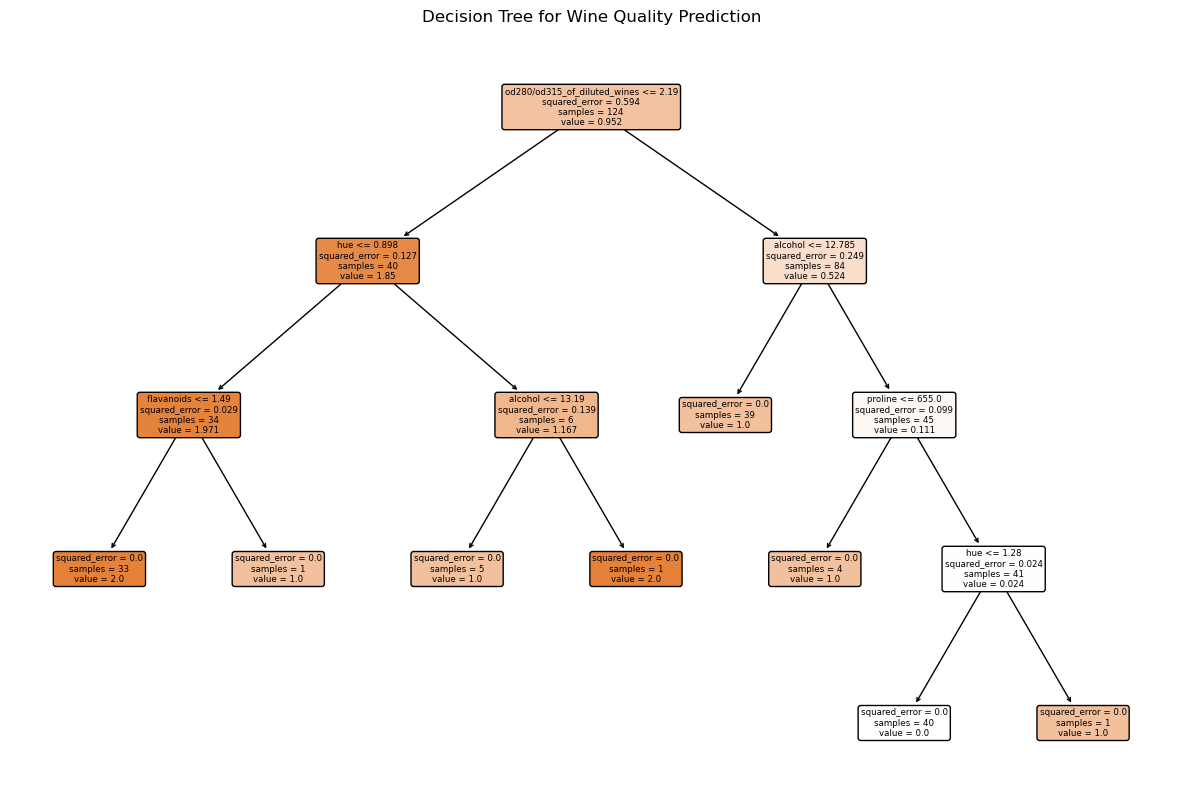

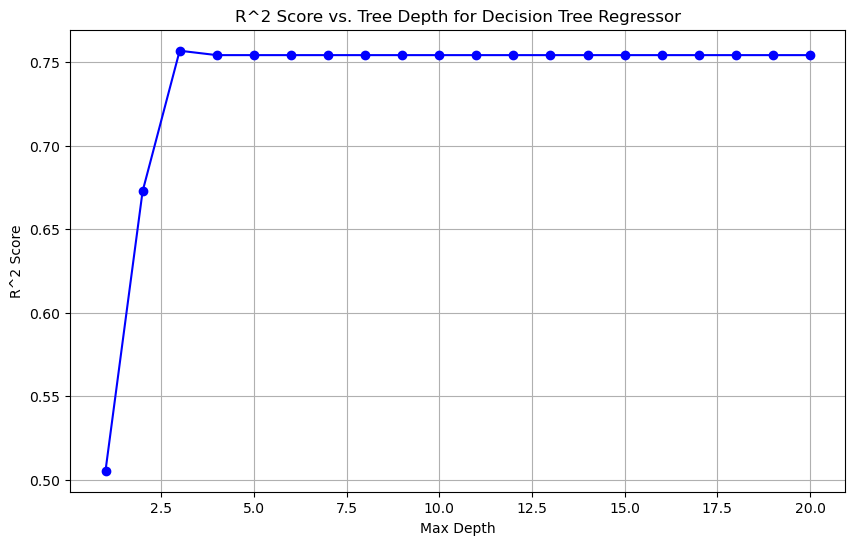

In [11]:

# Visualize the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=wine_data.feature_names, class_names=[str(i) for i in range(1, 11)], rounded=True)
plt.title("Decision Tree for Wine Quality Prediction")
plt.show()

# Analyze how accuracy changes as we increase the depth
depths = range(1, 21)
r2_scores = []

for depth in depths:
    # Train a Decision Tree with different depths
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Make predictions and calculate R^2
    y_pred = dt.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Plot R^2 score vs. depth
plt.figure(figsize=(10, 6))
plt.plot(depths, r2_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Max Depth")
plt.ylabel("R^2 Score")
plt.title("R^2 Score vs. Tree Depth for Decision Tree Regressor")
plt.grid(True)
plt.show()


As we can see, increasing the tree depth does increase accuracy, but only up to a certain point.